# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [38]:
import pandas as pd

In [39]:
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import warnings   
warnings.filterwarnings("ignore")

In [41]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [42]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [43]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [44]:
# # 시각화 한글폰트 설정
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False
# # plt.rc('font', family='Nanum')
# # sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
# #         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
# #         style='darkgrid') 

In [45]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [46]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [47]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [48]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.867754,46.074772,5471640,1.152860e+07
1,11020,21.524817,46.243086,5368440,1.153335e+07
2,11030,21.820458,38.444154,4959790,8.738356e+06
3,11040,22.150334,44.749214,5139830,1.038374e+07
4,11050,22.810568,50.076721,5020720,1.102214e+07


In [49]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [50]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [51]:
df.sort_values(by=['노선수'], ascending = False)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,22.411314,46.169868,4952990,1.020373e+07
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.074772,5471640,1.152860e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.243086,5368440,1.153335e+07
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.745571,61.763388,5525180,1.569303e+07
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.716321,48.965617,5232500,1.127879e+07
13,11140,마포구,562,97,5088461,4957596,103.907639,101.235343,22.307964,60.546047,5557360,1.508323e+07
19,11200,동작구,438,94,5314274,5112276,124.295965,119.571419,22.059056,45.151199,4944030,1.011960e+07
21,11220,서초구,600,93,7221330,6977950,126.687777,122.418028,23.119681,72.540004,5944440,1.865120e+07
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.459927,6543820,2.918882e+07
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.060305,5150450,1.163867e+07


In [52]:
df.columns = ['도착 시군구 코드', '자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '평균 이동 시간(분)', '이동인구(합)', '총 이동시간', '총 이동인구']

In [53]:
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.074772,5471640,1.152860e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.243086,5368440,1.153335e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.444154,4959790,8.738356e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.749214,5139830,1.038374e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.076721,5020720,1.102214e+07
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.070868,5132710,9.517475e+06
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.887741,43.680575,4635870,8.477046e+06
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.716321,48.965617,5232500,1.127879e+07
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.258539,4458260,7.735468e+06
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.138206,40.239780,4086140,6.540855e+06


In [54]:
df['승하차평균승객수'] = df['승차평균승객수'] + df['하차평균승객수']
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구,승하차평균승객수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.074772,5471640,1.152860e+07,257.423648
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.243086,5368440,1.153335e+07,236.344634
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.444154,4959790,8.738356e+06,272.377114
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.749214,5139830,1.038374e+07,190.676257
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.076721,5020720,1.102214e+07,236.875683


In [55]:
df.sort_values('승하차평균승객수', ascending=False).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구,승하차평균승객수
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.060305,5150450,1.163867e+07,312.269714
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.444154,4959790,8.738356e+06,272.377114
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.258539,4458260,7.735468e+06,261.811876
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.070868,5132710,9.517475e+06,260.533447
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.074772,5471640,1.152860e+07,257.423648


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
  - 승하차평균승객수가 많은 구에는 노선수가 많을 것이다.

* 가설 2

* 가설 3

## 2.단변량 분석

1. 변수의 비즈니스 의미  
   - '승하차평균승객수'는 자치구 별 승차 총 승객수의 평균 + 하차 총 승객수의 평균

2. 숫자? 범주?  
   - 숫자

3. 전처리 사항
   - 가변수화 대상여부 ==> 숫자형이므로 필요없음.
   - NaN 존재 여부 및 조치 방안

In [56]:
# NaN 존재 여부 확인 -> 존재하지 않음.
df['승하차평균승객수'].isna().sum()

0

4. 기초통계량

In [57]:
# 기초통계량 확인.
df['승하차평균승객수'].describe()

count     25.000000
mean     228.749820
std       33.855561
min      173.618124
25%      205.142983
50%      236.344634
75%      249.105805
max      312.269714
Name: 승하차평균승객수, dtype: float64

5. 분포(시각화)

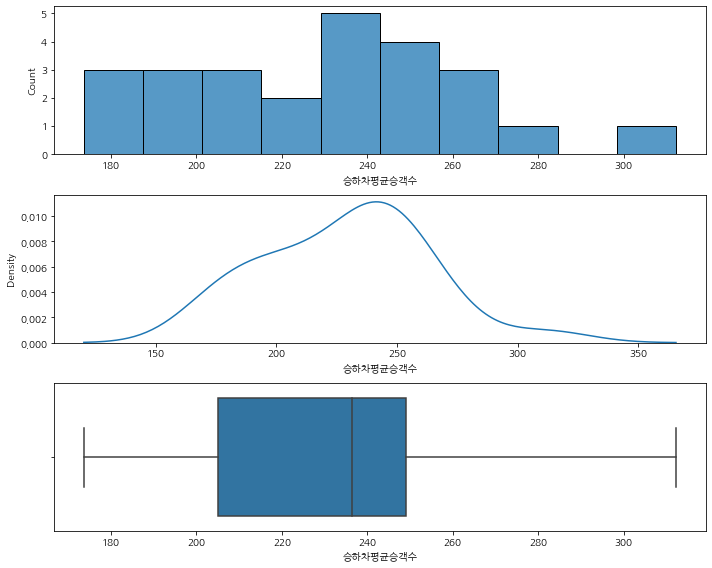

In [58]:
var = '승하차평균승객수'

plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
sns.histplot(df[var], bins = 10)

plt.subplot(3,1,2)
sns.kdeplot(df[var])

plt.subplot(3,1,3)
sns.boxplot(df[var])

plt.tight_layout()
plt.show()

In [59]:
df['승하차평균승객수'].median()

236.34463421668215

In [60]:
df['승하차평균승객수'].mean()

228.74982024937916

6. 위 정보로부터 파악한 내용(비즈니스!) 정리 
   - 승하차 평균 승객수는 중앙값에 많이 분포해있다.
   - 대체로 205 ~ 250에 분포해있다.
   - 승하차 승객수가 많은 구에는 노선이 많지 않을까?

7. 추가 분석해볼 사항 도출
   - 승하차 평균 승객수와 노선수의 관계
   - 승하차 평균 승객수와 버스정류장 수의 관계

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


#### 승하차평균승객수 --> 노선수

#### 1) 시각화

In [61]:
target = '노선수'

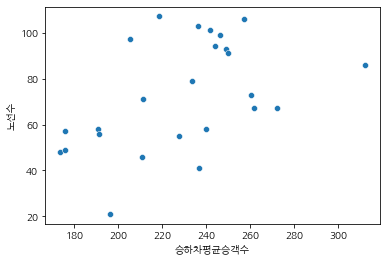

In [62]:
sns.scatterplot(x=var, y = target, data = df)
plt.show()

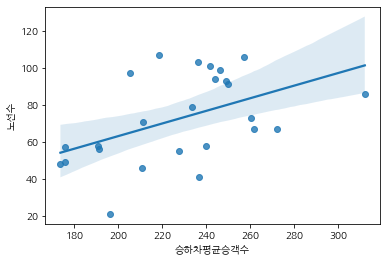

In [63]:
sns.regplot(x=var, y = target, data = df)
plt.show()

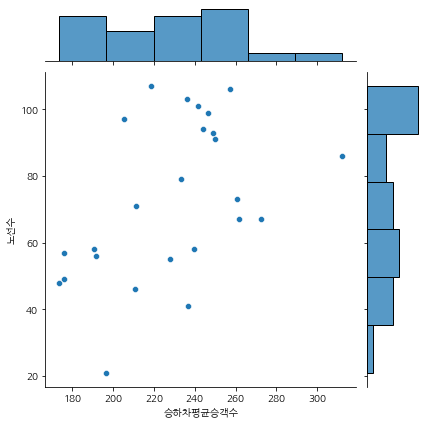

In [64]:
sns.jointplot(x=var, y = target, data = df)
plt.show()

#### 2) 수치화 : 상관분석

In [65]:
result = spst.pearsonr(df[var], df[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.4833597118514898, p-value : 0.014373797740162338


#### 3) 시각화와 수치화 결과로부터 파악한 내용

- 승하차평균승객수가 많을수록 자치구에 있는 노선수는 많다.
- 아주 높진 않은 양의 상관관계가 있다.
- 승하차승객수가 많으면 버스 이용을 많이 한다는 것이므로 아주 강한 상관관계를 이룰 줄 알았으나,  
노선수와 아주 강한 관계성은 띄지 않는다. 

#### 4) 가설검정

   - 대립가설(H1) : 승하차평균승객수에 따라 노선수에 차이가 있다.
   - 귀무가설(H0) : 승하차평균승객수에 따라 노선수에 차이가 없다.

   - 위에서 P-value은 0.01437이 나왔으므로, 승하차평균승객수 --> 노선수, 가설이 맞다고 결정할 때  
   그 결정이 틀릴 확률이 1.437%이다.
   - 유의수준으로 정한 5%보다 작으므로 세운 가설이 모집단에서 맞을 것이라고 판단할 수 있다.

## 4.관계 정리

In [66]:
# 각 변수들 간의 상관계수
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구,승하차평균승객수
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639775,0.276925,0.531895,0.023994
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387143,0.359348,0.370620,-0.117662
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013868,0.360500,0.188164,0.483360
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472630,0.572455,0.568739,0.544484
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460851,0.564608,0.550686,0.546382
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.081090,0.124998,0.051665,0.997352
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076703,0.133859,0.045808,0.997284
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360708,-0.125621,0.120328,-0.399948
이동인구(합),0.639775,0.387143,-0.013868,0.472630,0.460851,-0.081090,-0.076703,0.360708,1.000000,0.812468,0.963719,-0.079123
총 이동시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812468,1.000000,0.908125,0.129748


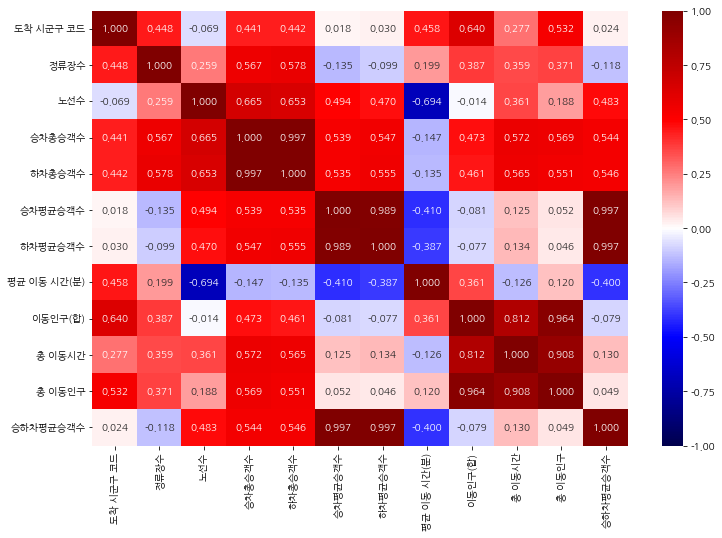

In [67]:
# 위의 결과를 sns.heatmap()로 그리기
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, fmt = '.3f', vmin = -1, vmax = 1
            ,cmap = 'seismic')
plt.show()

### 1) 강한 관계의 변수

- 승차총승객수-노선수, 하차총승객수-노선수, 승차평균승객수-노선수, 하차평균승객수-노선수, 승하차평균승객수-노선수

### 2) 약한 관계의 변수

 - 이동인구(합)-노선수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

- 세운 가설에 따라 승하차평균승객수가 많으면 노선수가 많아야 하기 때문에  
승하차평균승객수는 평균보다 높은데, 노선수는 평균보다 낮은 구에 노선을 추가하면 될 것이라고 생각한다.

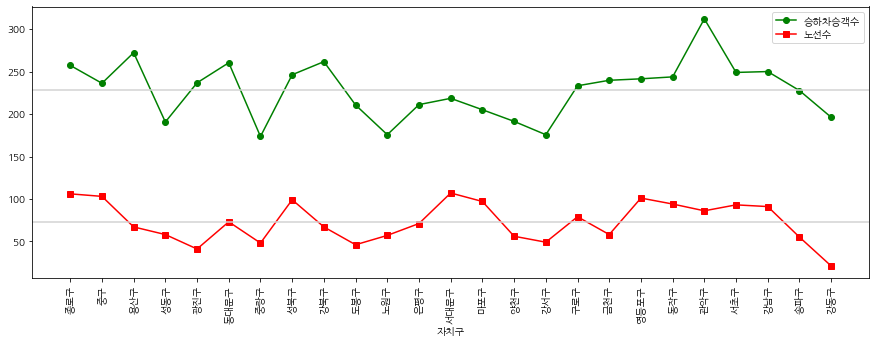

In [68]:
plt.figure(figsize = (15,5))

plt.plot('자치구', '승하차평균승객수', 'go-', data=df, label='승하차승객수')
plt.plot('자치구', '노선수', 'rs-', data=df, label='노선수')
plt.axhline(df['승하차평균승객수'].mean(), color = 'lightgray')
plt.axhline(df['노선수'].mean(), color = 'lightgray')
plt.xticks(rotation=90)
plt.xlabel('자치구')

plt.legend()
plt.show()

In [69]:
print(df['승하차평균승객수'].mean())
print(df['노선수'].mean())

228.74982024937916
72.92


In [70]:
line = df.loc[(df['승하차평균승객수'] > df['승하차평균승객수'].mean()) & (df['노선수'] < df['노선수'].mean())]
line2 = line.sort_values(by=['노선수'], ascending=[True])

In [71]:
line2[['자치구', '노선수', '승하차평균승객수']]

,자치구,노선수,승하차평균승객수
4,광진구,41,236.875683
17,금천구,58,239.849674
2,용산구,67,272.377114
8,강북구,67,261.811876


- 따라서, 광진구 > 금천구 > 용산구 > 강북구 순으로 버스 노선이 필요하다.